In [ ]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install stargazer

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer

In [ ]:
upload = files.upload()
wage = pd.read_csv('/content/wage.csv', sep=';')

Saving wage.csv to wage.csv


In [ ]:
wage = wage.astype(str)
wage = wage.applymap(lambda x: x.replace(',', '.'))

In [ ]:
wage = wage.iloc[1:]

In [ ]:
if "Berufsgenossenschaft" in wage.iloc[0]:
  wage.columns = wage.columns.str.replace("Berufsgenossenschaft", "year")

In [ ]:
wage = wage.apply(pd.to_numeric, errors='coerce')

In [ ]:
wage

,year,Eisen- und Stahl-year,Eisen- und Stahl-year.1,Eisen- und Stahl-year.2,Eisen- und Stahl-year.3,Eisen- und Stahl-year.4,Eisen-year,Maschinenbau- und Kleineisenindustrie-year,Hütten- und Walzwerk-year,Baugewerks-year,...,Baugewerks-year.8,Baugewerks-year.9,Baugewerks-year.10,Baugewerks-year.11,Textil-year,Textil-year.1,Textil-year.2,Textil-year.3,Textil-year.4,Textil-year.5
1,1885,69.14,63.14,69.97,48.38,67.40,6567.00,71.45,73.04,55.26,...,46.58,65.27,41.47,25.91,45.08,32.56,52.13,44.39,47.28,50.20
2,1886,86.75,78.85,69.92,47.29,67.08,6570.00,69.68,79.39,51.37,...,34.16,85.59,40.99,34.69,45.78,41.68,51.51,44.63,44.89,62.28
3,1887,72.18,68.63,71.01,48.71,67.69,6787.00,69.87,81.00,50.14,...,34.25,84.34,42.10,41.38,45.78,34.20,53.07,43.37,46.08,49.09
4,1888,62.25,72.39,69.03,52.82,69.38,6792.00,73.06,82.15,52.54,...,23.67,56.99,43.14,35.21,46.06,34.57,54.02,43.53,45.58,49.16
5,1889,68.14,69.17,73.99,50.35,74.37,69.42,75.55,85.41,54.17,...,21.87,62.47,26.01,37.40,46.68,35.46,54.98,43.26,46.01,50.15
6,1890,67.16,70.13,76.17,54.69,73.49,70.87,77.83,87.45,52.12,...,23.57,61.39,70.21,40.89,47.67,36.15,55.37,44.20,46.92,50.50
7,1891,68.21,71.43,75.35,55.67,73.88,72.32,77.77,89.85,53.26,...,24.29,60.83,31.07,37.55,47.83,36.47,55.43,44.83,46.66,51.54
8,1892,67.69,70.04,73.20,53.29,71.28,72.71,76.96,89.11,51.12,...,23.78,66.31,31.48,37.98,47.87,36.59,55.53,45.11,47.53,50.73
9,1893,67.62,70.29,72.71,56.54,70.88,72.47,77.71,88.69,51.63,...,22.64,59.51,31.26,39.23,48.69,37.04,56.11,48.97,50.84,51.44
10,1894,68.43,69.33,73.79,56.72,71.24,73.51,77.87,89.51,52.08,...,20.86,58.29,30.56,42.14,48.65,37.20,55.79,48.65,52.51,52.06


In [ ]:
columns_to_delete = ['Eisen-year',
       'Maschinenbau- und Kleineisenindustrie-year',
       'Hütten- und Walzwerk-year']
wage.drop(columns=columns_to_delete, inplace=True)

In [ ]:
eisen_stahl_columns = wage.columns[wage.columns.str.contains('Eisen- und Stahl-')]
Baugewerks_columns = wage.columns[wage.columns.str.contains('Baugewerks-')]
Textil_columns = wage.columns[wage.columns.str.contains('Textil-')]


# Calculate the coefficient of variation for each year (row)
wage['Eisen-und-Stahl-CV'] = wage[eisen_stahl_columns].apply(lambda row: row.std() / row.mean(), axis=1)
wage['Baugewerks-CV'] = wage[Baugewerks_columns].apply(lambda row: row.std() / row.mean(), axis=1)
wage['Textil-CV'] = wage[Textil_columns].apply(lambda row: row.std() / row.mean(), axis=1)


# Create a new DataFrame with 'Year' and 'Eisen-und-Stahl-CV' columns
cv_dataset = wage[['year', 'Eisen-und-Stahl-CV', 'Baugewerks-CV', 'Textil-CV']].copy()
cv_dataset

,year,Eisen-und-Stahl-CV,Baugewerks-CV,Textil-CV
1,1885,0.140085,0.240098,0.152314
2,1886,0.212338,0.324794,0.154654
3,1887,0.146785,0.264414,0.140595
4,1888,0.120278,0.204830,0.142357
5,1889,0.146211,0.273124,0.142894
6,1890,0.122174,0.240085,0.137841
7,1891,0.114340,0.246269,0.136853
8,1892,0.118850,0.253921,0.133699
9,1893,0.095409,0.252599,0.130406
10,1894,0.096899,0.253413,0.130976


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

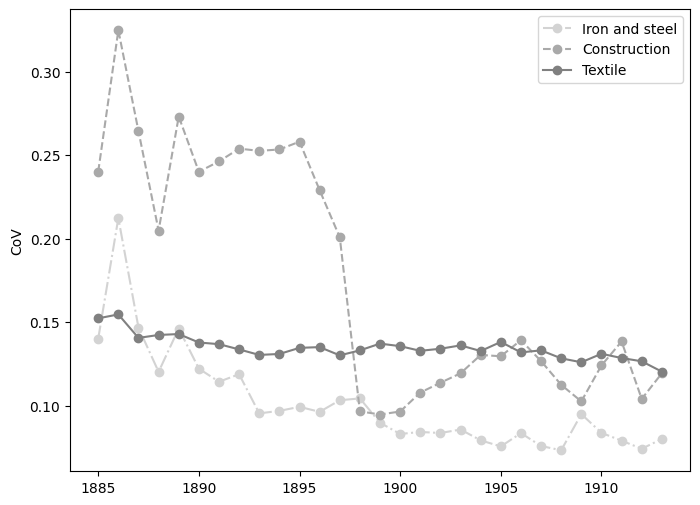

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cv_dataset['year'], cv_dataset['Eisen-und-Stahl-CV'], marker='o', linestyle='-.', color='lightgray', label='Iron and steel')
plt.plot(cv_dataset['year'], cv_dataset['Baugewerks-CV'], marker='o', linestyle='--', color='darkgray', label='Construction')
plt.plot(cv_dataset['year'], cv_dataset['Textil-CV'], marker='o', linestyle='-', color='gray', label='Textile')
plt.ylabel('CoV')
#plt.title('Monthly wages coefficient of variation between different provinces of Prussia')
plt.legend()
plt.savefig('cov1.png', dpi=300)
files.download('cov1.png')
plt.show()

In [ ]:
upload = files.upload()
labor_iron = pd.read_csv('/content/labor_iron.csv', sep=';')

Saving labor_iron.csv to labor_iron.csv


In [ ]:
labor_iron = labor_iron.astype(str)
labor_iron = labor_iron.applymap(lambda x: x.replace(',', '.'))

In [ ]:
labor_iron = labor_iron.apply(pd.to_numeric, errors='coerce')

In [ ]:
labor_iron

,Region,Süddeutschland,Sachsen-Thüringen,Nordostdeutschland,Schlesien,Nordwestdeutschland
0,1885,62913,48380,36930,50154,48921
1,1886,63887,49938,39910,50228,50708
2,1887,72151,53819,43294,53868,58129
3,1888,89400,55020,46394,54804,63232
4,1889,92770,66911,51783,66198,69092
5,1890,103852,71486,56636,69110,75947
6,1891,106534,69397,56835,71302,78216
7,1892,105345,71439,56211,72732,78112
8,1893,106366,75111,56976,69168,78508
9,1894,109957,80303,57822,71815,79362


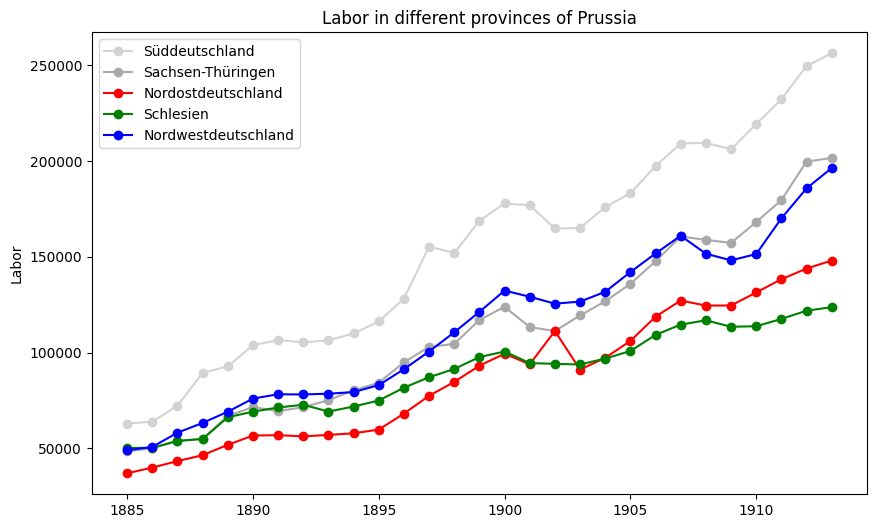

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(labor_iron['Region'], labor_iron['Süddeutschland'], marker='o', linestyle='-', color='lightgray', label='Süddeutschland')
plt.plot(labor_iron['Region'], labor_iron['Sachsen-Thüringen'], marker='o', linestyle='-', color='darkgray', label='Sachsen-Thüringen')
plt.plot(labor_iron['Region'], labor_iron['Nordostdeutschland'], marker='o', linestyle='-', color='red', label='Nordostdeutschland')
plt.plot(labor_iron['Region'], labor_iron['Schlesien'], marker='o', linestyle='-', color='green', label='Schlesien')
plt.plot(labor_iron['Region'], labor_iron['Nordwestdeutschland'], marker='o', linestyle='-', color='blue', label='Nordwestdeutschland')
plt.ylabel('Labor')
plt.title('Labor in different provinces of Prussia')
plt.legend()
plt.show()

In [ ]:
upload = files.upload()
wage_iron = pd.read_csv('/content/wage_iron.csv', sep=';')

Saving wage_iron.csv to wage_iron.csv


In [ ]:
wage_iron = wage_iron.astype(str)
wage_iron = wage_iron.applymap(lambda x: x.replace(',', '.'))

In [ ]:
wage_iron = wage_iron.apply(pd.to_numeric, errors='coerce')

In [ ]:
wage_iron

,Region,Süddeutschland,Sachsen-Thüringen,Nordostdeutschland,Schlesien,Nordwestdeutschland
0,1885,69.14,63.14,69.97,48.38,67.40
1,1886,86.75,78.85,69.92,47.29,67.08
2,1887,72.18,68.63,71.01,48.71,67.69
3,1888,62.25,72.39,69.03,52.82,69.38
4,1889,68.14,69.17,73.99,50.35,74.37
5,1890,67.16,70.13,76.17,54.69,73.49
6,1891,68.21,71.43,75.35,55.67,73.88
7,1892,67.69,70.04,73.20,53.29,71.28
8,1893,67.62,70.29,72.71,56.54,70.88
9,1894,68.43,69.33,73.79,56.72,71.24


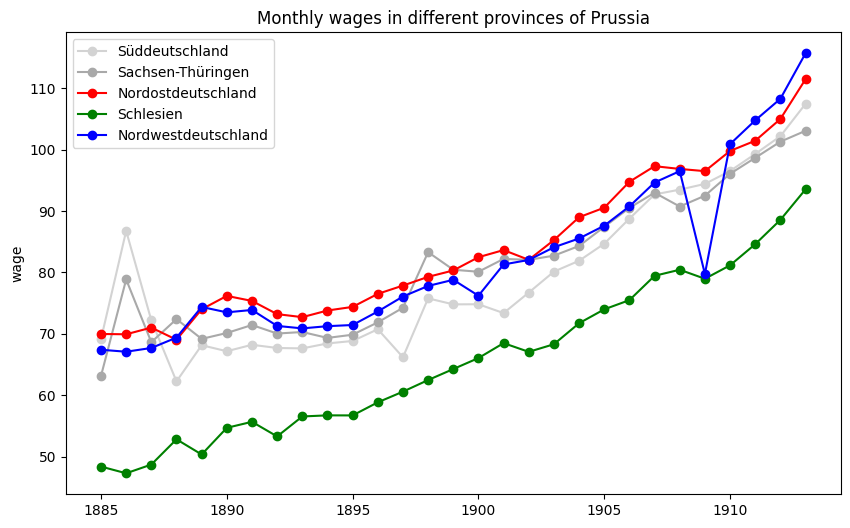

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(wage_iron['Region'], wage_iron['Süddeutschland'], marker='o', linestyle='-', color='lightgray', label='Süddeutschland')
plt.plot(wage_iron['Region'], wage_iron['Sachsen-Thüringen'], marker='o', linestyle='-', color='darkgray', label='Sachsen-Thüringen')
plt.plot(wage_iron['Region'], wage_iron['Nordostdeutschland'], marker='o', linestyle='-', color='red', label='Nordostdeutschland')
plt.plot(wage_iron['Region'], wage_iron['Schlesien'], marker='o', linestyle='-', color='green', label='Schlesien')
plt.plot(wage_iron['Region'], wage_iron['Nordwestdeutschland'], marker='o', linestyle='-', color='blue', label='Nordwestdeutschland')
plt.ylabel('wage')
plt.title('Monthly wages in different provinces of Prussia')
plt.legend()
plt.show()